# Transductive binary node classification by scikit-learn label propagation and label spreading

In [208]:
# --------------------------------------------------
# Libraries
# --------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import make_circles
import random
import math

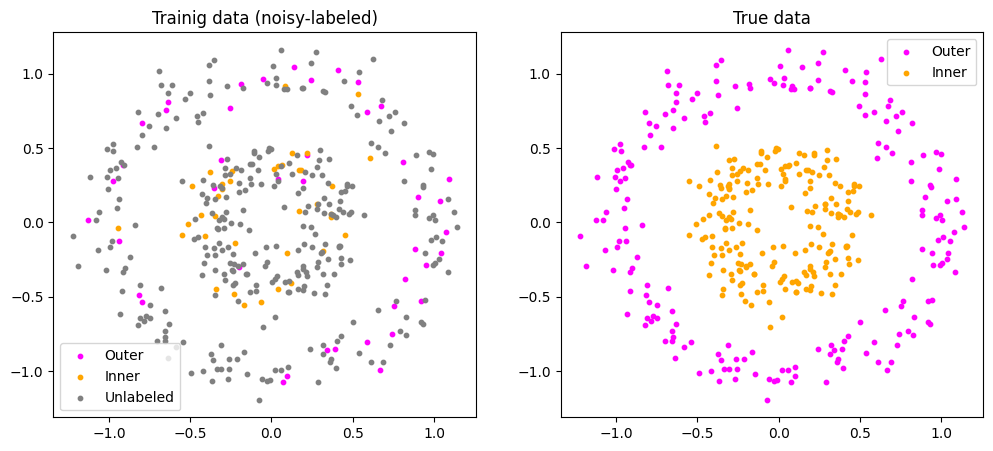

In [211]:
# --------------------------------------------------
# Geberate data
# --------------------------------------------------

# Settings
n_samples = 400
factor = 0.4
label_rate = 0.2
flip_rate = 0.1
noise = 0.1

# Dataset
X, y = make_circles(n_samples = n_samples, noise = noise, factor = factor, shuffle = True, random_state = 123)

# Labeling
n_labeled = math.floor(n_samples*0.5*label_rate)
outer, inner = 0, 1
labels = np.full(n_samples, -1.)
labels[np.where(y==inner)[0][0:n_labeled]] = [int(random.uniform(0, 1) >= flip_rate) for x in range(n_labeled)]
labels[np.where(y==outer)[0][0:n_labeled]] = [int(random.uniform(0, 1) <= flip_rate) for x in range(n_labeled)]

# Plot
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].scatter(X[labels == outer, 0], X[labels == outer, 1], label = "Outer", s = 10, color = 'magenta')
ax[0].scatter(X[labels == inner, 0], X[labels == inner, 1], label = "Inner", s = 10, color = 'orange')
ax[0].scatter(X[labels == -1, 0], X[labels == -1, 1], label = "Unlabeled", s = 10, color = 'gray')
ax[0].legend()
ax[0].set_title("Trainig data (noisy-labeled)")
ax[1].scatter(X[y == outer, 0], X[y == outer, 1], label = "Outer", s = 10, color = 'magenta')
ax[1].scatter(X[y == inner, 0], X[y == inner, 1], label = "Inner", s = 10, color = 'orange')
ax[1].legend()
ax[1].set_title("True data")
plt.show()

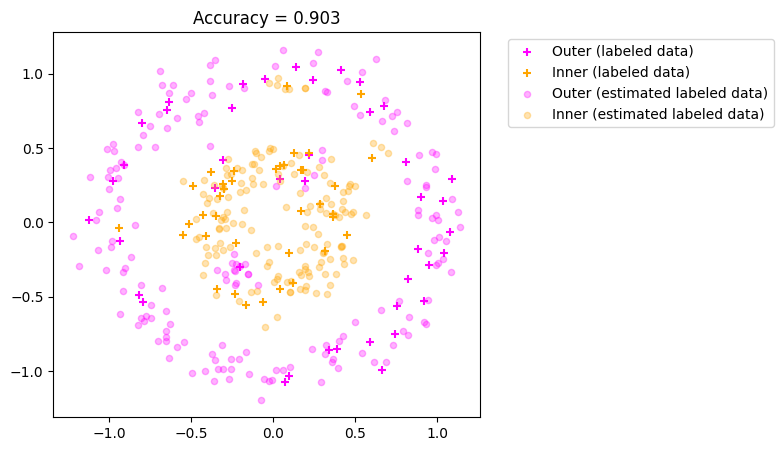

In [216]:
# --------------------------------------------------
# Label propagation
# --------------------------------------------------

# Settings
kernel = 'knn' # kernel{‘knn’, ‘rbf’} or callable, default=’rbf’
n_neighbors = 5 # Parameter for knn kernel which need to be strictly positive. "gamma" is parameter for rbf kernel.

# Trainig
model = LabelPropagation(kernel = kernel, n_neighbors = n_neighbors, max_iter = 1000, n_jobs = -1)
model.fit(X, labels)
estimated_label = model.transduction_
accuracy = (estimated_label[np.where(labels == -1)[0]] == y[np.where(labels == -1)[0]]).sum()/y[np.where(labels == -1)[0]].shape[0]

# Plot
fig, ax = plt.subplots(1, 1, figsize = (5.5, 5))
ax.scatter(X[np.where(labels == outer)[0],0], X[np.where(labels == outer)[0],1], label = "Outer (labeled data)", s = 40, color = 'magenta',  marker = '+')
ax.scatter(X[np.where(labels == inner)[0],0], X[np.where(labels == inner)[0],1], label = "Inner (labeled data)", s = 40, color = 'orange', marker = '+')
ax.scatter(X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == outer)[0]),0], X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == outer)[0]),1],
           s = 20, color = 'magenta', alpha = 0.3, label =  "Outer (estimated labeled data)")
ax.scatter(X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == inner)[0]),0], X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == inner)[0]),1],
           s = 20, color = 'orange', alpha = 0.3, label =  "Inner (estimated labeled data)")
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))
ax.set_title(f"Accuracy = {accuracy:.3f}")
plt.show()

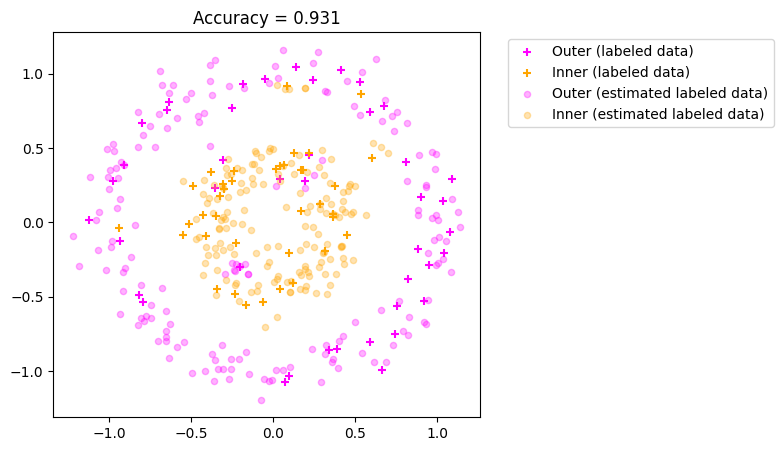

In [218]:
# --------------------------------------------------
# Label spreading
# --------------------------------------------------

# Settings
kernel = 'knn' # kernel{‘knn’, ‘rbf’} or callable, default=’rbf’
n_neighbors = 5 # Parameter for knn kernel which need to be strictly positive. "gamma" is parameter for rbf kernel.
alpha = 0.6 # Clamping factor in (0, 1).

# Trainig
model = LabelSpreading(kernel = kernel, n_neighbors = n_neighbors, alpha = alpha, max_iter = 1000, n_jobs = -1)
model.fit(X, labels)
estimated_label = model.transduction_
accuracy = (estimated_label[np.where(labels == -1)[0]] == y[np.where(labels == -1)[0]]).sum()/y[np.where(labels == -1)[0]].shape[0]

# Plot
fig, ax = plt.subplots(1, 1, figsize = (5.5, 5))
ax.scatter(X[np.where(labels == outer)[0],0], X[np.where(labels == outer)[0],1], label = "Outer (labeled data)", s = 40, color = 'magenta',  marker = '+')
ax.scatter(X[np.where(labels == inner)[0],0], X[np.where(labels == inner)[0],1], label = "Inner (labeled data)", s = 40, color = 'orange', marker = '+')
ax.scatter(X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == outer)[0]),0], X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == outer)[0]),1],
           s = 20, color = 'magenta', alpha = 0.3, label =  "Outer (estimated labeled data)")
ax.scatter(X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == inner)[0]),0], X[np.intersect1d(np.where(labels == -1)[0], np.where(estimated_label == inner)[0]),1],
           s = 20, color = 'orange', alpha = 0.3, label =  "Inner (estimated labeled data)")
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))
ax.set_title(f"Accuracy = {accuracy:.3f}")
plt.show()